Submission oleh Rahma Ardianti

In [62]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import shutil
import zipfile

In [63]:
#mempersiapkan data
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-30 15:27:57--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss  84%[===============>    ] 259.39M  1.46MB/s    in 3m 30s  

2021-05-30 15:31:28 (1.24 MB/s) - Read error at byte 271990784/322873683 (Connection reset by peer). Retrying.

--2021-05-30 15:31:29--  (try: 2)  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 

In [64]:
#ekstraksi pada file zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scis_dir = os.path.join(base_dir, 'scissors')

In [82]:
#meilihat struktur data
os.listdir('/tmp/rockpaperscissors')

['scissors',
 'paper',
 'rock',
 'val',
 'README_rpc-cv-images.txt',
 'train',
 'rps-cv-images']

In [66]:
len(os.listdir('/tmp/rockpaperscissors/scissors'))

750

In [67]:
len(os.listdir('/tmp/rockpaperscissors/paper'))

712

In [68]:
len(os.listdir('/tmp/rockpaperscissors/rock'))

726

In [69]:
# memecah direktori scissors, paper, rock menjadi data train dan data validation
train_scis_dir, val_scis_dir = train_test_split(os.listdir(scis_dir), test_size = 0.4)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)

In [70]:
#membuat direktori baru
if os.path.exists(train_dir):
  shutil.rmtree(train_dir)

if os.path.exists(validation_dir):
  shutil.rmtree( validation_dir)

os.mkdir(train_dir)
os.mkdir(validation_dir)

In [71]:
train_scis = os.path.join(train_dir, 'scissors')
train_paper = os.path.join(train_dir, 'paper')
train_rock = os.path.join(train_dir, 'rock')
val_scis = os.path.join(validation_dir, 'scissors')
val_paper = os.path.join(validation_dir, 'paper')
val_rock = os.path.join(validation_dir, 'rock')

In [72]:
os.mkdir(train_scis)
os.mkdir(train_paper)
os.mkdir(train_rock)
os.mkdir(val_scis)
os.mkdir(val_paper)
os.mkdir(val_rock)

In [73]:
for x in train_scis_dir:
  shutil.copy(os.path.join(scis_dir,x), os.path.join(train_scis,x))
for x in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,x), os.path.join(train_paper,x))
for x in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, x), os.path.join(train_rock, x))

for x in val_scis_dir:
  shutil.copy(os.path.join(scis_dir,x), os.path.join(val_scis,x))
for x in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,x), os.path.join(val_paper,x))
for x in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, x), os.path.join(val_rock,x))


In [74]:
train_datagen = ImageDataGenerator(
    rescale=1./255,        
    rotation_range=40,
    horizontal_flip=True,
    vertical_flip = True,
    fill_mode='nearest',
    validation_split = 0.2
)
valid_datagen = ImageDataGenerator(
    rescale=1./255,        
    rotation_range=40,
    horizontal_flip=True,
    vertical_flip = True,
    fill_mode='nearest',
    validation_split = 0.2
)

In [76]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 30,
    class_mode = 'categorical'
)

validation_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 30,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [77]:
#membuat model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [78]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [81]:
history = model.fit(
    train_generator,
    steps_per_epoch = 40,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 25,
    verbose =2
)

Epoch 1/20
40/40 - 80s - loss: 0.9434 - accuracy: 0.4983 - val_loss: 0.6321 - val_accuracy: 0.7760
Epoch 2/20
40/40 - 79s - loss: 0.5455 - accuracy: 0.7903 - val_loss: 0.4439 - val_accuracy: 0.8320
Epoch 3/20
40/40 - 78s - loss: 0.4020 - accuracy: 0.8532 - val_loss: 0.3326 - val_accuracy: 0.8600
Epoch 4/20
40/40 - 78s - loss: 0.3766 - accuracy: 0.8507 - val_loss: 0.2963 - val_accuracy: 0.8920
Epoch 5/20
40/40 - 78s - loss: 0.3260 - accuracy: 0.8808 - val_loss: 0.3675 - val_accuracy: 0.8587
Epoch 6/20
40/40 - 78s - loss: 0.3427 - accuracy: 0.8834 - val_loss: 0.2555 - val_accuracy: 0.9027
Epoch 7/20
40/40 - 77s - loss: 0.2599 - accuracy: 0.9128 - val_loss: 0.2580 - val_accuracy: 0.9080
Epoch 8/20
40/40 - 77s - loss: 0.2332 - accuracy: 0.9136 - val_loss: 0.1618 - val_accuracy: 0.9467
Epoch 9/20
40/40 - 77s - loss: 0.2237 - accuracy: 0.9178 - val_loss: 0.2554 - val_accuracy: 0.9013
Epoch 10/20
40/40 - 77s - loss: 0.1783 - accuracy: 0.9329 - val_loss: 0.1947 - val_accuracy: 0.9413
Epoch 11/

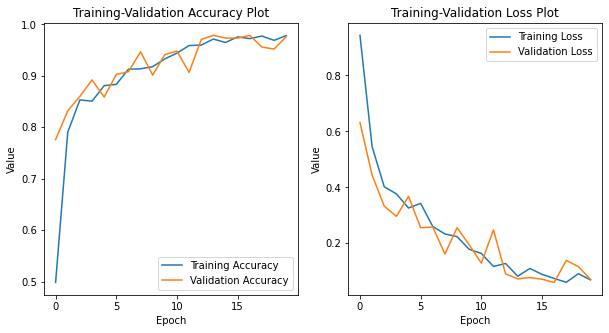

In [83]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 5))
#memetakan plot akurasi data training dan validasi 
plt.subplot(1,2,1)
plt.title('Training-Validation Accuracy Plot')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
#memetakan plot loss data training dan validasi 
plt.subplot(1,2,2)
plt.title('Training-Validation Loss Plot')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

Saving Rock-paper-scissors_(scissors).png to Rock-paper-scissors_(scissors) (2).png
Rock-paper-scissors_(scissors).png
scissors


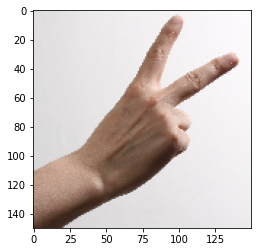

In [86]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('scissors')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('paper')